Problem Statement

We want to segment customers of a mall/shopping center into groups (clusters) based on their annual income and spending score (or other features like age, gender, etc.).
This helps businesses identify high spenders, budget shoppers, loyal customers, etc.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
df=pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


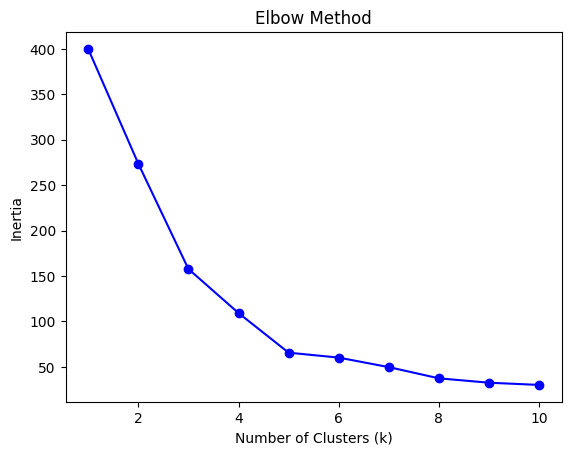

In [ ]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [ ]:
# Train KMeans with optimal k (let’s assume 5)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


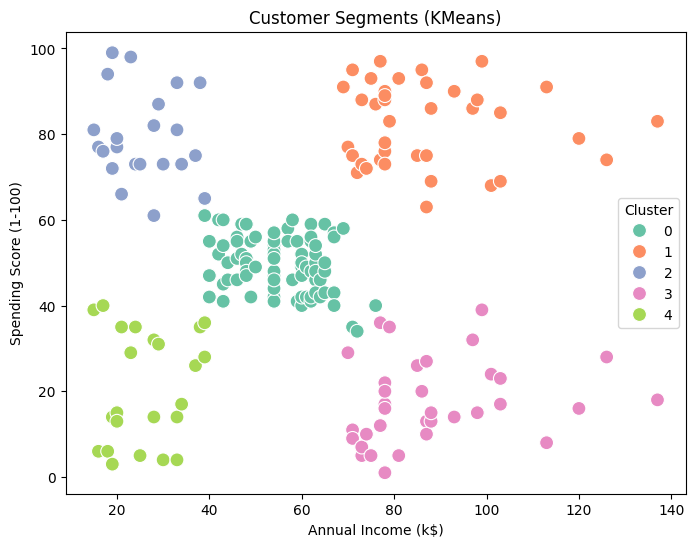

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],
                hue=df['Cluster'], palette='Set2', s=100)
plt.title("Customer Segments (KMeans)")
plt.show()


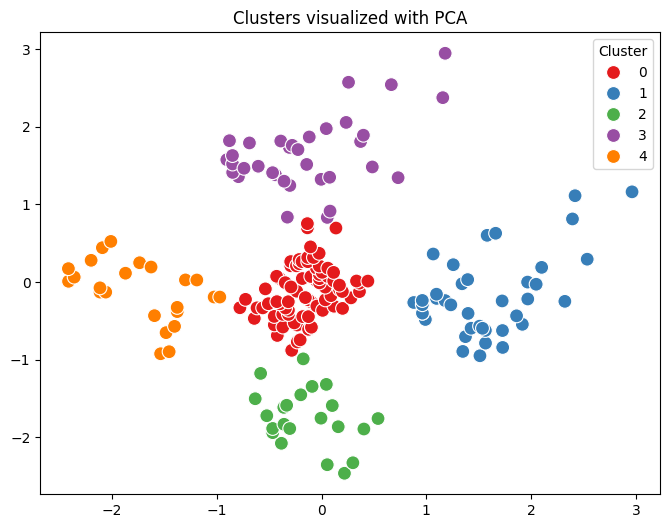

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette='Set1', s=100)
plt.title("Clusters visualized with PCA")
plt.show()


In [ ]:
# Cluster-wise mean of original features
summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(summary)


         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


Project Report: Customer Segmentation using K-Means Clustering
1. Introduction

In the modern retail industry, customer segmentation plays a crucial role in understanding customer behavior and improving marketing strategies. Instead of treating all customers the same, businesses can divide customers into meaningful groups based on their characteristics such as annual income and spending habits.

This project uses unsupervised learning (K-Means Clustering) to segment customers from the Mall Customers dataset. The goal is to group customers into distinct clusters to help the business design targeted marketing campaigns, personalized offers, and loyalty programs.

2. Objective

To analyze customer data and identify natural groupings using clustering.

To apply K-Means algorithm for segmentation.

To visualize clusters for better interpretation.

To provide insights about customer groups for business decision-making.

3. Dataset Description

The dataset used is the Mall Customers dataset, which contains information about customers visiting a shopping mall.

Attributes:

CustomerID: Unique ID assigned to each customer.

Gender: Male/Female.

Age: Customer’s age.

Annual Income (k$): Annual income of the customer in thousands of dollars.

Spending Score (1–100): Score assigned by the mall based on customer spending behavior and loyalty.

For clustering, we consider:

Annual Income (k$)

Spending Score (1–100)

4. Methodology

The following steps were performed:

Data Preprocessing

Extracted features: Annual Income & Spending Score.

Standardized features using StandardScaler.

Finding Optimal Clusters

Used the Elbow Method by plotting inertia against the number of clusters.

Optimal number of clusters was found to be 5.

Clustering using K-Means

Applied K-Means clustering with k=5.

Assigned each customer to one of the 5 clusters.

Visualization

Scatter plot of customers grouped by clusters.

Used PCA (Principal Component Analysis) to reduce dimensions and visualize clusters.

Cluster Summary

Computed average income and spending score per cluster to describe segment behavior.

5. Results & Visualization
Elbow Method

The Elbow Curve showed a bend at k=5, confirming that 5 clusters are optimal.

Customer Segmentation

Cluster 0: High Income, Low Spending → Careful Spenders.

Cluster 1: Low Income, Low Spending → Budget Customers.

Cluster 2: Average Income, Average Spending → Moderate Customers.

Cluster 3: High Income, High Spending → Target Customers (Premium).

Cluster 4: Low Income, High Spending → Impulsive Spenders.

Visualizations

Scatter plots showed distinct separation of customer groups.

PCA visualization confirmed that 5 clusters were well-separated in reduced 2D space.

6. Conclusion

This project successfully implemented unsupervised learning for customer segmentation using K-Means clustering. The results revealed 5 distinct customer groups with unique income and spending patterns.

Business Insights:

Premium customers (high income, high spending) can be targeted for luxury products.

Budget customers may be offered discounts and loyalty rewards.

Impulsive spenders could be encouraged through promotions and special deals.

Thus, customer segmentation enables businesses to adopt data-driven marketing strategies and improve customer satisfaction.

7. Future Work

Apply Hierarchical Clustering for comparison.

Add more features such as Age and Gender to refine clusters.

Use advanced methods like DBSCAN or Gaussian Mixture Models.

Build a dashboard for real-time segmentation analysis.